# 1) 데이터 읽기

In [48]:
import pandas as pd

df = pd.read_csv('./abalone.csv')

df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [49]:
# id는 필요 없는 데이터이므로 삭제함

df = df.drop('id', axis = 1)

# 2) 결측치 확인

In [50]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

# 3) 클래스 갯수 확인 (그래프, 레이블 갯수)

Text(0.5, 1.0, 'How old abalone is')

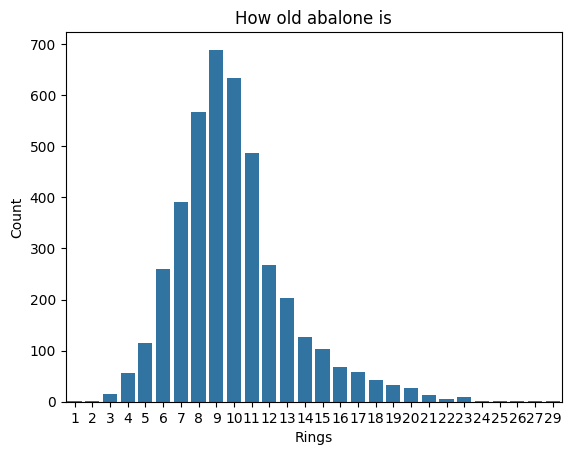

In [51]:
# 레이블 갯수 확인 (그래프)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("How old abalone is")

In [52]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

# 5) X, Y 나누기

In [53]:
X = df.drop('Rings', axis = 1)
Y = df['Rings']

print(X.head())
print()
print(Y.value_counts())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055  

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64


## 6-1) One-Hot Encoding

성별은 범주형 데이터이므로 One-Hot Encoding을 해준다.

In [54]:
X = pd.get_dummies(X, columns=['Sex'])

X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,False,True,False
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,True,False,False


## 6-2) 데이터 스케일링

성별은 이미 True와 False로 나누어져 있기 때문에, 성별을 제외한 나머지 features만 스케일링을 해준다.

In [55]:
X.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [56]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']])

X_scaled_data

X_ = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']) 

X_

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


In [57]:
X__ = X[['Sex_F', 'Sex_M', 'Sex_I']]

X__

,Sex_F,Sex_M,Sex_I
0,False,True,False
1,False,True,False
2,True,False,False
3,False,True,False
4,False,False,True
...,...,...,...
4172,True,False,False
4173,False,True,False
4174,False,True,False
4175,True,False,False


In [58]:
X = pd.concat([X_, X__], axis = 1)

X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_M,Sex_I
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,False,True,False
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,False,True,False
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,True,False,False
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,False,True,False
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,False,False,True
...,...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,True,False,False
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,False,True,False
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,False,True,False
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,True,False,False


# 7) Train데이터, Test데이터 나누기

In [60]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_M,Sex_I
3141,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065,False,False,True
3521,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104,False,False,True
883,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726,False,True,False
3627,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072,False,True,False
2106,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479,False,True,False


# 8) 모델 정의, 학습, 예측

## Support Vector Machine

In [61]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, Y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(Y_test, pred_svm))
print(confusion_matrix(Y_test, pred_svm))


--- SVM Classifier ---
0.2799043062200957
[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 10 11  6  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2 21 15  2  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 16 33 16 24  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 12 39 51  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 13 68 37  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4  4 41 41 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  4 29 39 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 24 29 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  9 20  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 10 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 12  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  9  1  0  0  0  0  0  0  0  0  0  0  

## Linear Regression

In [62]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- Logistic Regression Classifier ---
0.2703349282296651
[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 10 14  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3 21 13  6  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 21 27 30 18  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 11 50 37  9  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 22 60 32  3  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 13 31 40 17  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 10 27 34 16  0  2  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4 18 24 14  0  3  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  5 17 14  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  4 13  2  0  3  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 11  4  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  5  5  0  1  0  1  0 

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

In [63]:
# RandomForest

from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf = RandomForestClassifier(random_state=0, class_weight = 'balanced')

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- RandomForest Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- RandomForest Classifier ---
0.23803827751196172
[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7 11  8  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  6 18 12  6  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 23 31 30  7  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  2 13 45 22 19  5  3  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  7 32 30 35 13  2  3  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8  6 24 32 19  9  3  0  0  3  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5  8 22 31 18  5  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  6 18 17 15  3  5  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  8  4 11  6  2  2  0  0  1  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  7  6  1  0  2  1  3  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  3  6  2  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 

## Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

clf = DecisionTreeClassifier(random_state = 0)

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- DecisionTree Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- DecisionTree Classifier ---
0.20933014354066987
[[ 3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  4  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  9  9  4  7  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5 12 13  9  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 19 30 26 15  3  1  0  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  8 17 30 25 16  4  6  1  1  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  4  4 31 31 17 15  7  7  3  3  3  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  4 12 26 25 16  5  8  4  2  1  0  2  0  2  0  0  0  0]
 [ 0  0  0  0  5  6 15 26 14  8  7  2  5  0  2  3  1  0  0  0  1  0]
 [ 0  0  0  1  0  9 14 10  5  7  4  6  4  1  0  1  1  1  0  1  1  0]
 [ 0  0  0  0  0  1 10  4  4  6  5  0  1  2  1  1  2  0  0  0  2  0]
 [ 0  0  0  0  0  1  2  5  4  4  5  1  0  2  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  2  2  0  2  6  1  0  3  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  1  1  1  3  3  0  0  1  0 

## KNN

In [65]:
from sklearn.neighbors import KNeighborsRegressor

for i in range(1, 6) : # neighbor의 갯수를 다양하게 실험
    clf = KNeighborsRegressor(n_neighbors = i)

    # 학습
    clf.fit(X_train, Y_train)

    # 테스트 데이터로 예측
    y_pred= clf.predict(X_test)


    # 확률에 가장 가까운 정수로 class를 예측
    y_pred_class = np.around(y_pred)

    # 정확도 계산
    print ("\n--- KNN Classifier (n_neighbors = {0}) ---".format(i))
    print (accuracy_score(Y_test, y_pred_class))
    print (confusion_matrix(Y_test, y_pred_class))


--- KNN Classifier (n_neighbors = 1) ---
0.17703349282296652
[[ 0  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  5  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  9  8  7  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  6 16 11  7  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 20 27 27 13  3  2  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 17 30 24 16 11  5  1  2  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  3  9 27 29 18 24  6  2  4  1  1  0  1  1  0  0  0  0  0]
 [ 0  1  0  3  3  8 25 15 20 13  7  2  3  2  1  0  3  1  0  0  0  0]
 [ 0  0  0  0  3 10 24 18 10  9  6  2  3  2  3  2  2  0  1  0  0  0]
 [ 0  0  0  1  3  4 13 11 15  7  6  1  0  1  1  1  0  0  0  1  1  0]
 [ 0  0  0  0  1  1  7  7  7  5  0  4  1  1  1  2  1  0  0  0  1  0]
 [ 0  0  0  0  1  2  3  4  4  1  3  0  1  2  3  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  2  2  2  1  1  3  2  1  2  0  1  0  1  0  0  0]
 [ 0  0  0  0  1  1  0  3  1  2  0  3  0 

예측 결과가 좋지 않은 이유 예상
1) Classification은 1년만 다르게 예측하더라도 틀린 결과로 인식된다. Rings는 전복의 나이를 의미하는데 1년의 오차도 감안하지 않는 것은 너무 각박하다.
2) 상관관계의 문제가 있을 수 있다.

# 상관관계 확인

In [67]:
# 성별을 One Hot encoding

df = pd.get_dummies(df, columns=['Sex'])

df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,True,False,False


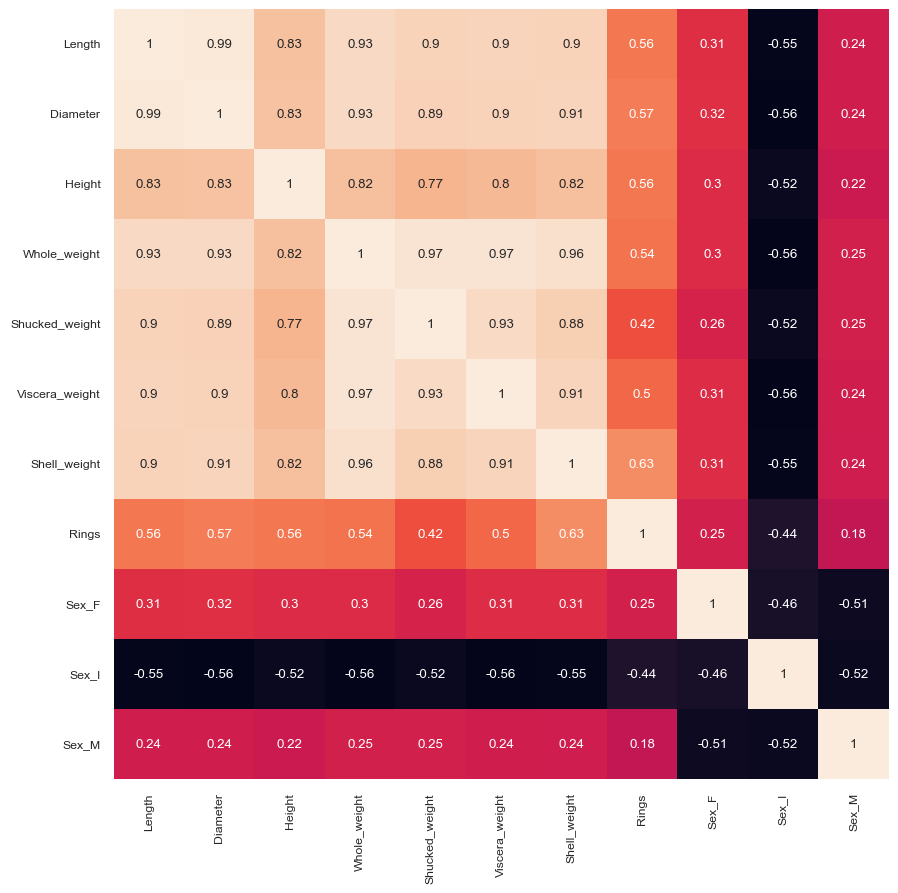

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

# 히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

성별은 Rings와 관련이 적음을 발견했다. 이는 오히려 Overfitting 문제를 일으킬 수 있다.
문제를 해결하기 위해 성별을 제거한 X값으로 다시 분류를 시도해보았다.

In [70]:
X = X.drop(['Sex_M', 'Sex_F', 'Sex_I'], axis = 1)

X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


In [71]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
3141,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065
3521,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104
883,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726
3627,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072
2106,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479


In [72]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, Y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(Y_test, pred_svm))
print(confusion_matrix(Y_test, pred_svm))


--- SVM Classifier ---
0.27870813397129185
[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  8 15  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3 18 17  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 15 37 36  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 12 58 30  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 11 27 53 33  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  2 18 31 37 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  5 11 21 36 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  8 18 28 10  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  5  5 19  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 10  9  3  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 12  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  8  1  0  0  0  0  0  0  0  0  0  0 

In [73]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- Logistic Regression Classifier ---
0.2619617224880383
[[ 0  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  8 16  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  3 15 18  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16 29 43  9  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 11 52 36  8  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  7 28 55 32  2  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  2 16 32 35 18  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  3  9 26 30 19  0  4  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  7 19 19 15  0  3  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  3 18 12  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  5 12  2  0  4  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 10  5  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  1  5  4  0  1  0  0  1 

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
# RandomForest

from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf = RandomForestClassifier(random_state=0, class_weight = 'balanced')

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- RandomForest Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- RandomForest Classifier ---
0.24162679425837322
[[ 1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  4  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7 10 12  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4 19 13  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 22 31 29  8  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  4 19 43 31  7  4  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8 28 31 42 12  0  2  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4 13 19 37 20  6  2  2  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3  7 32 31 15  1  3  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 10 17 16 13  3  4  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  7 11  8  2  4  1  0  1  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  5  7  3  0  2  2  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  5  5  0  1  2  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 

In [75]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

clf = DecisionTreeClassifier(random_state = 0)

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- DecisionTree Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- DecisionTree Classifier ---
0.20454545454545456
[[ 3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  5  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  5 10  8  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7 10 13  8  4  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5 18 23 27 10  8  4  1  0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  7 17 33 22 18 10  1  2  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3  9 22 28 26 14  9  8  2  3  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  3 16 20 25 22  6  6  4  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  2 14 16 23 17  5  6  2  5  2  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  1 10 13 10  8  7  5  1  3  2  0  0  1  1  1  1  1  0  0]
 [ 0  0  0  0  0  2  7  4  4  5  4  3  2  5  1  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  5  3  2  1  3  3  2  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  1  3  1  0  0  3  3  1  1  0  0  1  0  0  0  0]
 [ 0  0  0 

결론 : RandomForest의 경우에는 정확도가 살짝 올랐지만, 나머지 모델에서는 오히려 정확도가 떨어지는 결과를 얻어냈다. 이정도 양의 데이터는 Overfitting에 영향을 주지 않는가?